In [1]:
# Imports
import pandas as pd 
import random as rnd
from pathlib import Path
%matplotlib inline

In [2]:
# Bring in NBA game stats csv contains NBA team data from 2014 to 2018
nba_stats_csv = Path('../1. Data_Cleaning/Raw_Data/nba_team_stats.csv')

# Read csv into a pandas Dataframe
game_stats = pd.read_csv(nba_stats_csv)
game_stats.tail()


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
9835,78119,WAS,78,4/3/2018,Away,HOU,L,104,120,38,...,18,27,0.667,10,46,26,13,3,9,14
9836,79119,WAS,79,4/5/2018,Away,CLE,L,115,119,47,...,22,28,0.786,5,35,26,10,3,16,14
9837,80119,WAS,80,4/6/2018,Home,ATL,L,97,103,35,...,16,23,0.696,7,50,24,5,5,18,22
9838,81124,WAS,81,4/10/2018,Home,BOS,W,113,101,41,...,22,27,0.815,13,44,22,14,1,16,18
9839,82119,WAS,82,4/11/2018,Away,ORL,L,92,101,33,...,22,27,0.815,6,42,20,6,7,16,27


In [3]:
# Create dataframes for two teams with highest sharpe ratios; Oklahoma City Thunder and Dallas Mavericks

# Oklahoma City Thunder (OKC) dataframe
okc_df = game_stats[game_stats.Team == 'OKC']
#okc_df.head()

# Dallas Mavericks (DAL) dataframe
dal_df = game_stats[game_stats.Team == 'DAL']
#dal_df.head()


<AxesSubplot:>

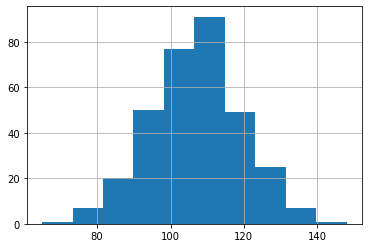

In [4]:
# Create histogram to look at points scored by OKC
okc_df.TeamPoints.hist()

<AxesSubplot:>

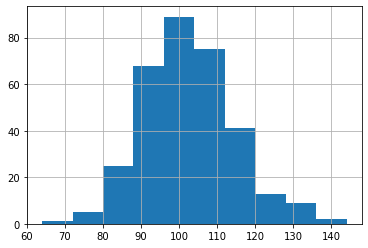

In [5]:
# Create histogram to look at points scored by DAL
dal_df.TeamPoints.hist()

<AxesSubplot:>

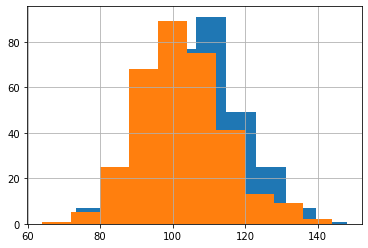

In [6]:
# Overlay points scored histograms
okc_df.TeamPoints.hist()
dal_df.TeamPoints.hist()

<AxesSubplot:>

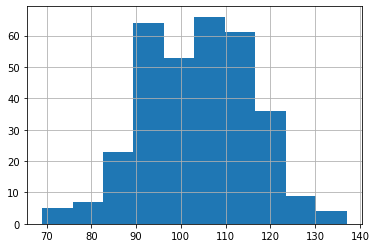

In [7]:
# Create histogram to look at points allowed by OKC
okc_df.OpponentPoints.hist()

<AxesSubplot:>

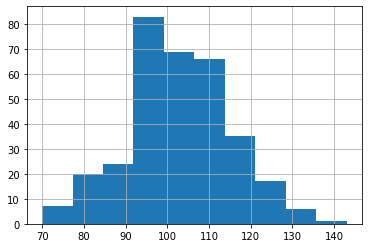

In [8]:
# Create histogram to look at points allowed by DAL
dal_df.OpponentPoints.hist()

<AxesSubplot:>

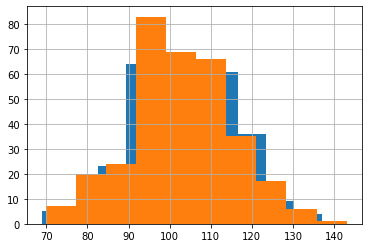

In [9]:
# Overlay histograms to look at points allowed by each team

okc_df.OpponentPoints.hist()
dal_df.OpponentPoints.hist()

In [10]:
# Calculate mean and standard deviation for OKC

okc_mean_pts = okc_df.TeamPoints.mean()
okc_std_pts = okc_df.TeamPoints.std()
okc_mean_opp_pts = okc_df.OpponentPoints.mean()
okc_std_opp_pts = okc_df.OpponentPoints.std()
print("OKC Points Mean ", okc_mean_pts)
print("OKC Points SD ", okc_std_pts)
print("OKC Opponent Points Mean ", okc_mean_opp_pts)
print("OKC Opponent Points SD ", okc_std_opp_pts)

OKC Points Mean  107.15548780487805
OKC Points SD  12.546314214658402
OKC Opponent Points Mean  103.7469512195122
OKC Opponent Points SD  12.22720646069557


In [11]:
# Calculate mean and standard deviation for DAL

dal_mean_pts = dal_df.TeamPoints.mean()
dal_std_pts = dal_df.TeamPoints.std()
dal_mean_opp_pts = dal_df.OpponentPoints.mean()
dal_std_opp_pts = dal_df.OpponentPoints.std()
print("DAL Points Mean ", dal_mean_pts)
print("DAL Points SD ", dal_std_pts)
print("DAL Opponent Points Mean ", dal_mean_opp_pts)
print("DAL Opponent Points SD ", dal_std_opp_pts)

DAL Points Mean  101.9359756097561
DAL Points SD  11.908886447326019
DAL Opponent Points Mean  102.77743902439025
DAL Opponent Points SD  12.541155862329557


In [12]:
# Create a mean and standard derivation normal distribuution and randomly sample from it using gaussian function

# To create simulated score sum the mean points scored and standard deviation of points scored for team 1 + mean points allowed and standard deviation of points allowed for team 2 and divide sum by 2 
def gameSim():
    OKCScore = (rnd.gauss(okc_mean_pts, okc_std_pts)+ rnd.gauss(dal_mean_opp_pts,dal_std_opp_pts))/2
    DALScore = (rnd.gauss(dal_mean_pts, dal_std_pts)+ rnd.gauss(okc_mean_opp_pts,okc_std_opp_pts))/2
    if int(round(OKCScore)) > int(round(DALScore)):
        return 1
    elif int(round(OKCScore)) < int(round(DALScore)):
        return -1
    else: return 0

In [13]:
# create function to repeat the simulation for number of games selected

def gamesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('OKC Win ', team1win/(team1win+team2win+tie),'%')
    print('DAL Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout

In [14]:
gamesSim(1000)

OKC Win  0.553 %
DAL Win  0.417 %
Tie  0.03 %


[1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 0,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 0,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 -1,
 -1,
 0,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 0,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 0,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 